In [6]:
from __future__ import print_function
__author__= 'el_2666'

import pylab as pl
import numpy as np
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
distributions = ['chisq']

In [4]:
mymean = 100

In [5]:
df = mymean

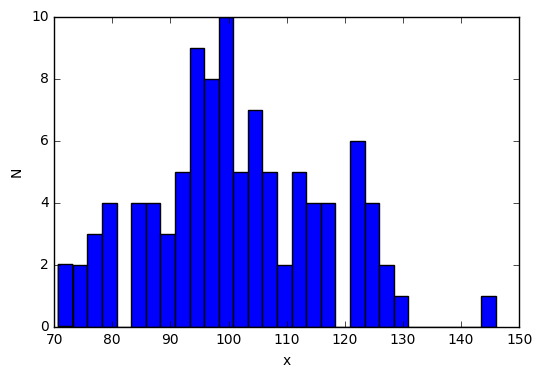

In [7]:
md = {}
md['chisq'] = np.random.chisquare(df, size=100)
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

## Figure 1: Chi sq distribution: df = 100, N=100

In [8]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 101.21, standard deviation: 14.69


In [9]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20] (99,)


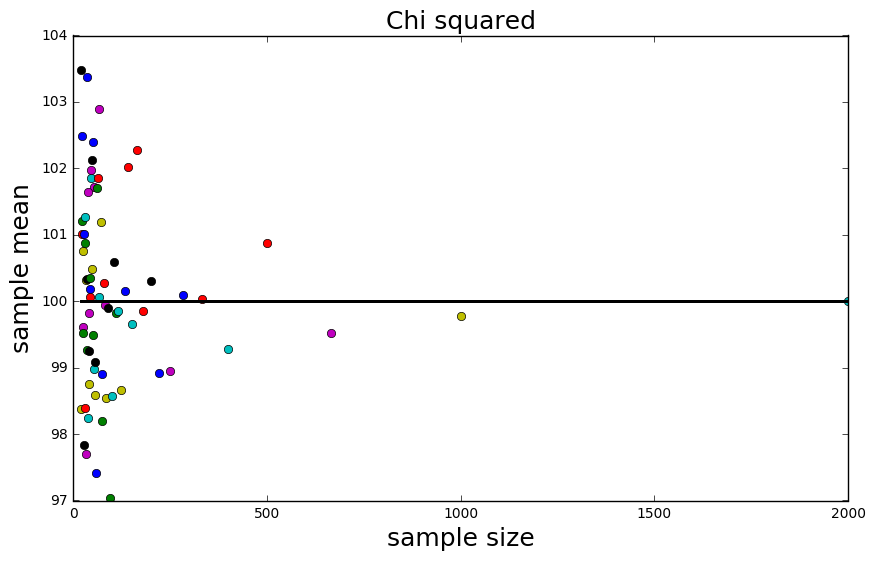

In [10]:
md['chisq'] = {} 

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)  

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

## Figure 2: According to the law of large numbers, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer as more trials are performed. Here we can see that the points are drawing closer with the increasing number in sample size.

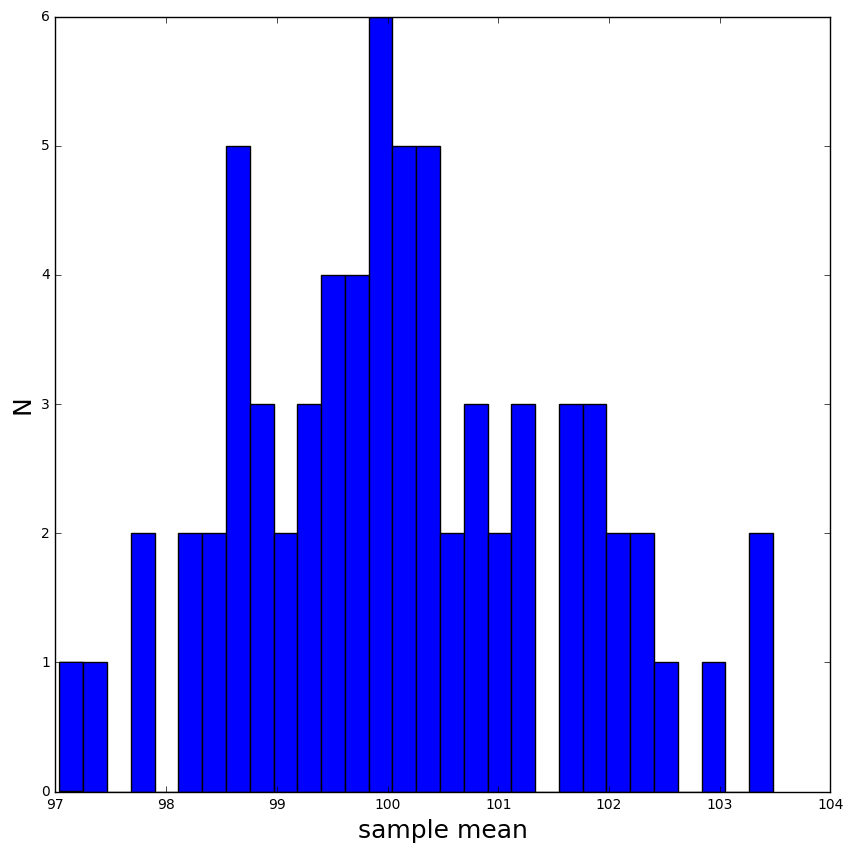

In [11]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

## Figure 3: [...]

## Normal distribution

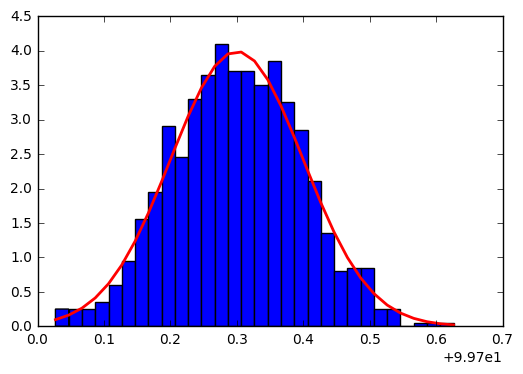

In [14]:
distributions = ['lnorm']

mu, sigma = 100, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
abs(mu - np.mean(s)) < 0.01
True
abs(sigma - np.std(s, ddof=1)) < 0.01
True
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')
plt.show()

## Poisson distribution

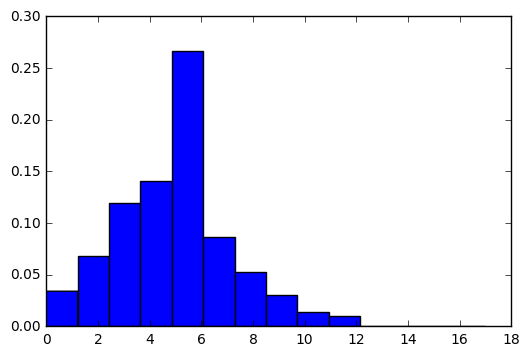

In [15]:
import numpy as np
s = np.random.poisson(5, 10000)

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 14, normed=True)
plt.show()

## Binomial distribution

In [17]:
n, p = 10, .5  
s = np.random.binomial(n, p, 100)
sum(np.random.binomial(9, 0.1, 20000) == 0)/20000


0

## Gaussian distribution

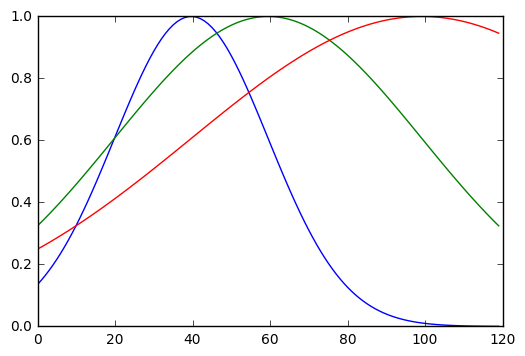

In [16]:
from matplotlib import pyplot as mp
import numpy as np

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

for mu, sig in [(-1, 1), (0, 2), (2, 3)]:
    mp.plot(gaussian(np.linspace(-3, 3, 120), mu, sig))

mp.show()

Source: http://stackoverflow.com/questions/14873203/plotting-of-1-dimensional-gaussian-distribution-function